In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

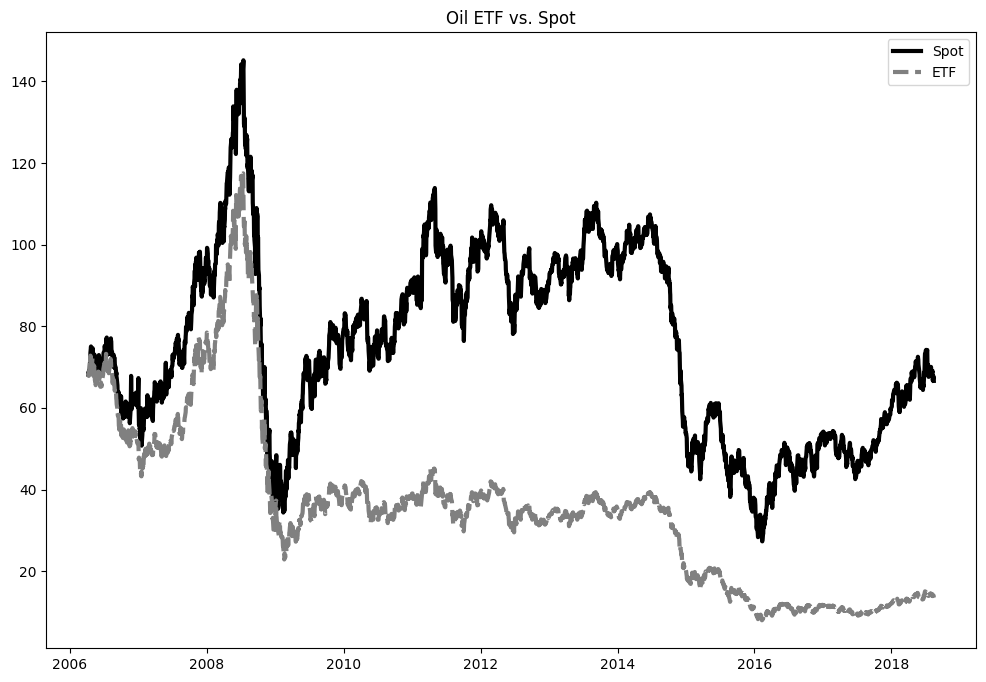

In [2]:
df = pd.read_csv('oil_etf_vs_spot.csv', index_col='Date', parse_dates=['Date'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('Oil ETF vs. Spot')
ax.plot(df['WTI-West-Texas-Intermediate'], linestyle='-', label='Spot', linewidth=3.0, color='black')
ax.plot(df['USO'], linestyle='--', label='ETF', linewidth=3.0, color = 'grey')
ax.legend()

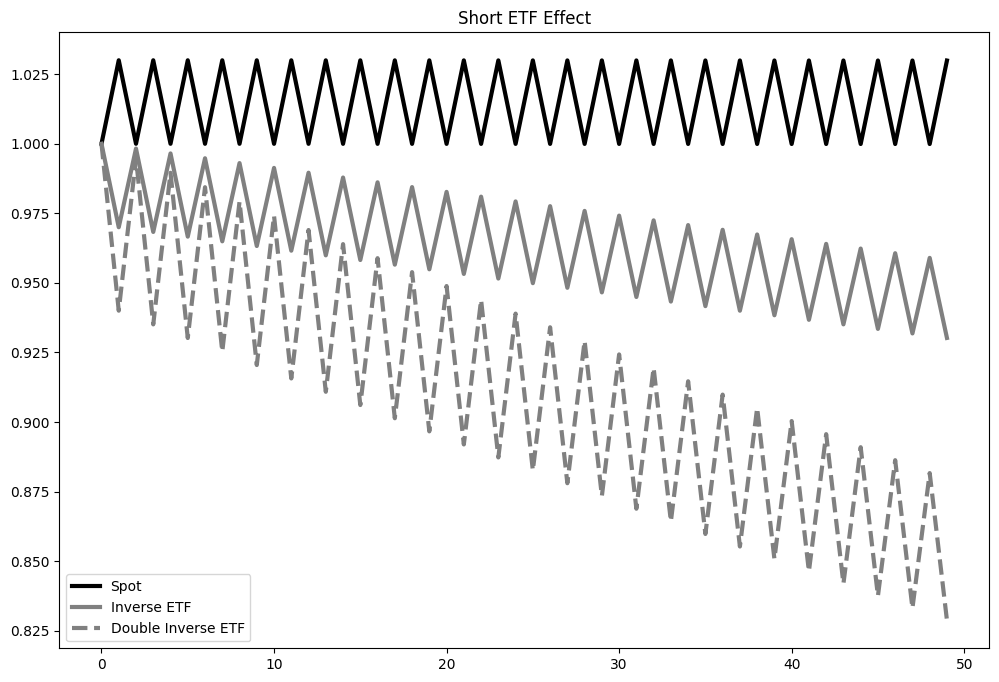

In [4]:
df = pd.DataFrame(index=range(50))

df.loc[df.index % 2 == 1,'underlying_return'] = 0.03
df.loc[df.index % 2 == 0,'underlying_return'] = -0.02913

df.iloc[0].loc['underlying_return'] = 0

df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

df['short_return'] = df['underlying_return'] * -1
df['double_short_return'] = df['underlying_return'] * -2

df['short_price'] = (df['short_return'] + 1).cumprod()
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['underlying_price'], linestyle='-', label='Spot', linewidth=3.0, color='black')
ax.plot(df['short_price'], linestyle='-', label='Inverse ETF', linewidth=3.0, color = 'grey')
ax.plot(df['double_short_price'], linestyle='--', label='Double Inverse ETF', linewidth=3.0, color = 'grey')
ax.legend()

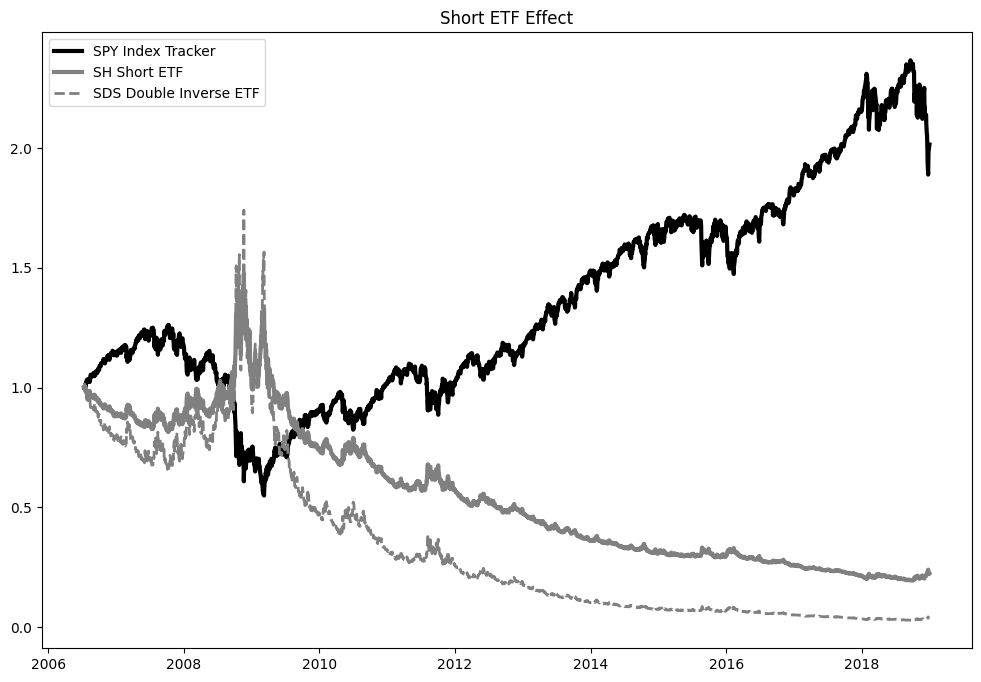

In [5]:
def rebased(ts):
    return ts / ts[0]

df = pd.read_csv('short_etfs.csv', index_col='Date', parse_dates=['Date'])

df = df.apply(rebased)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['SPY'], linestyle='-', label='SPY Index Tracker', linewidth=3.0, color='black')
ax.plot(df['SH'], linestyle='-', label='SH Short ETF', linewidth=3.0, color = 'grey')
ax.plot(df['SDS'], linestyle='--', label='SDS Double Inverse ETF', linewidth=2.0, color = 'grey')
ax.legend()